# Stock Forecasting with the SARIMA Model

## Summary

**SARIMA Model:** Seasonal Autoregressive Integrated Moving Average (SARIMA) model, a time series forecasting method, is implemented to capture the underlying patterns and trends in the stock price data.

The Seasonal Autoregressive Integrated Moving Average (SARIMA) model provides a robust framework for predicting stock prices. SARIMA's ability to capture seasonal patterns and cyclic behavior inherent in sequential data, along with its foundation in statistical time series analysis principles, lends credibility to our predictions. The model's interpretable parameters allow for a deeper understanding of the underlying dynamics driving stock price movements. However, it's important to note SARIMA's limitation in capturing external factors such as news events or sudden market shocks, which may impact stock prices but are not directly incorporated into the model. Despite this consideration, SARIMA remains a valuable tool for predicting stock prices based on historical patterns and internal data dynamics.

For this project, four time ranges of historical data were evaluated for the accuracy of the SARIMA models' predictions for three different stocks (AAPL, TSLA, NVDA).

Predicted Dates: 06-01-2024 to 06-11-2024

Historical Data Time Ranges:

1. 01-01-2015 to 5-31-2024
2. 01-01-2017 to 5-31-2024
3. 01-01-2029 to 5-31-2024
4. 01-01-2021 to 5-31-2024

From these time ranges, it was determined how much historical data provided the most accurate predictions through the use of comparison metrics (R-squared, p-value, RMSE, MSE, MAPE, AIC, BIC).

### Question: Is the SARIMA model useful for your company's toolkit? 

Yes, this tool has excellent accuracy (on average, 96.8% accuracy for the recent time ranges (2019, 2021)).

Parameters for Selection:
1. Accuracy (RMSE, MSE, MAPE)
2. Speed
3. Compute resource usage considerations
4. Reproducibility
5. World Events
6. Other factors

**Selected Model:** The SARIMA models with the most recent historical data time range (2021) were chosen because:
- The more recent models demonstrated high accuracy in capturing seasonal trends and underlying patterns in stock data.
- The more recent models provided interpretable parameters that offer insights into stock price movements.

Other time ranges (2015, 2017) weren't as effective because:
- These time ranges showed slower computation times.
- These time ranges had lower accuracy metrics compared to recent time ranges.
- These time ranges required more computational resources, making them less practical for real-time stock prediction.

### A Little More Detail About Why Not Other Answers and Methods (Context)

Time Series Prediction vs. Other Machine Learning Tasks: SARIMA specifically excels in time series analysis, making it well-suited for stock price predictions where historical data is crucial. In contrast, other machine learning models may not capture the temporal dependencies as effectively.

Specifics of the Model:
SARIMA: Captures seasonality and trends in data, making it robust for stocks with clear patterns (e.g., AAPL and TSLA).
Other Models (like ARIMA or regression-based models): While they may also predict stock prices, they often fail to account for seasonal variations, leading to less accurate forecasts.
Contextual Effectiveness:
The SARIMA model's ability to utilize recent historical data proved beneficial for stable stocks like AAPL, while its effectiveness varied with more volatile stocks like NVDA and TSLA, which required longer historical data for accurate predictions.

### Why Not Other Models?

1. **ARIMA (Autoregressive Integrated Moving Average)**:
   - While ARIMA is effective for univariate time series data, it lacks the capability to model seasonal patterns as effectively as SARIMA. SARIMA extends ARIMA by incorporating seasonal components, making it more suitable for datasets with clear seasonal trends, such as stock prices.

2. **GARCH (Generalized Autoregressive Conditional Heteroskedasticity)**:
   - GARCH models focus primarily on modeling volatility and are useful for forecasting the variance of returns rather than predicting actual prices. They are not designed for point forecasts of stock prices, limiting their applicability for direct price prediction tasks.

3. **XGBoost**:
   - XGBoost is a powerful machine learning algorithm that excels in classification and regression tasks. However, it does not inherently account for the temporal dependencies in time series data. Without careful feature engineering to incorporate time-based features, it may not perform as well for stock price predictions as SARIMA, which directly models these temporal relationships.

4. **Random Forest**:
   - Like XGBoost, Random Forest is a robust model for various prediction tasks but does not leverage the sequential nature of time series data. While it can provide accurate predictions with sufficient data, it typically requires extensive feature engineering to capture the temporal dynamics, which is automatically handled by SARIMA.

5. **TBATS (Trigonometric, Box-Cox Transformation, ARMA Errors, Trend, and Seasonal Components)**:
   - TBATS is designed for complex seasonal patterns, but it can be computationally intensive and may require tuning of multiple parameters. In contrast, SARIMA offers a more straightforward framework for seasonal data without needing as much computational overhead.

6. **Prophet**:
   - Prophet is user-friendly and effective for forecasting time series data with strong seasonal effects and missing values. However, it may not be as robust for datasets with less clear seasonal patterns or when high-frequency forecasting is needed. SARIMA, with its statistical basis, can provide more granular control over the model parameters for precise forecasting.

### Summary
While each of these models has its strengths, they may not capture the intricate seasonal patterns and temporal relationships present in stock price data as effectively as SARIMA. SARIMA’s design specifically caters to time series forecasting, allowing for more reliable predictions in financial contexts, particularly when historical data plays a critical role.

## How

### High-Level Description of Final Process for AAPL, NVDA, and TSLA

Based on the dataset comprising historical stock prices from 2021 (AAPL, TSLA) and 2019 (NVDA), the SARIMA model was utilized, leveraging packages such as statsmodels, pandas, and matplotlib to create the most accurate predictions. The results were visualized using the matplotlib package.

This dataset employs definitions for Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and prediction accuracy.

**Definition of Accuracy:** Accuracy in this context refers to the degree to which the predicted values from the SARIMA model align with actual observed values, as indicated by the low MSE, RMSE, and MAPE metrics.

### Demonstration of How to Implement SARIMA Model



Step 1: Necessary packages were imported into Python. Packages important to note were pandas, numpy, yfinance, etc.

In [2]:
# Step 1: Import packages
# % pip install pandas
# % pip install numpy
# % pip install plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pmdarima as pm

Step 2: The user input was taken by selecting a stock, and multiple years of historical data for the selected stock were downloaded and stored in the stock_select_str variable. In this case, the stock was AAPL.

In [3]:
# Step 2: User input for stock ticker
stock_select_str = input("Enter stock ticker: ")

# Initial load run
stock_data = yf.download(stock_select_str, start='2021-01-01', end='2024-05-31', interval='1d')


[*********************100%%**********************]  1 of 1 completed


Step 3: The historical data for AAPL was checked before processing. 

In [4]:
# Step 3: Check data before processing
print(stock_data.head())
print(stock_data.info())
print(stock_data.describe())

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2021-01-04  133.520004  133.610001  126.760002  129.410004  126.683441   
2021-01-05  128.889999  131.740005  128.429993  131.009995  128.249741   
2021-01-06  127.720001  131.050003  126.379997  126.599998  123.932640   
2021-01-07  128.360001  131.630005  127.860001  130.919998  128.161591   
2021-01-08  132.429993  132.630005  130.229996  132.050003  129.267838   

               Volume  
Date                   
2021-01-04  143301900  
2021-01-05   97664900  
2021-01-06  155088000  
2021-01-07  109578200  
2021-01-08  105158200  
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 857 entries, 2021-01-04 to 2024-05-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       857 non-null    float64
 1   High       857 non-null    float64
 2   Low        857 non-null  

Steps 4 and 5: The historical data was processed by the SARIMA model.

Step 4: The index of the stock_data DataFrame was first converted to a DateTimeIndex to enable easy filtering. Then, weekend data was filtered out by retaining only rows where the day of the week was less than 5 (Monday to Friday).

Step 5: The process_model function was defined to create and configure a SARIMA (Seasonal AutoRegressive Integrated Moving Average) model. The function took stock_transformed as input and processed its "Close" price data. The auto_arima function was set up to optimize the SARIMA model parameters (like p, q, P, and Q) with specific settings: a yearly seasonal cycle (m=12), seasonal differencing of order 1, and stepwise selection for efficiency. After fitting, the model was returned for further use.

In [5]:
# Step 4: Process data
# Ensure the index is a DateTimeIndex for easy filtering
stock_data.index = pd.to_datetime(stock_data.index)

# Filter out weekends
stock_data = stock_data[stock_data.index.to_series().dt.dayofweek < 5]

# Step 5: Define the process_model function
def process_model(stock_transformed):
    print("Processing SARIMA model...\n")
    
    sarima_model = pm.auto_arima(stock_transformed["Close"], start_p=1, start_q=1,
                                  test='adf',
                                  max_p=3, max_q=3,
                                  m=12,  # 12 is the frequency of the cycle (yearly)
                                  start_P=0,
                                  seasonal=True,  # Set to seasonal
                                  d=None,
                                  D=1,  # Order of the seasonal differencing
                                  trace=False,
                                  error_action='ignore',
                                  suppress_warnings=True,
                                  stepwise=True)
    
    return sarima_model



In [6]:
# Fit the SARIMA model
sarima_model = process_model(stock_data)

Processing SARIMA model...



Step 6: The predictions were run by calling a built-in predict function. The n_forecast variable is 12 because of the number of days to forecast. 

In [7]:
# Step 6: Run predictions
n_forecast = 12
forecast, conf_int = sarima_model.predict(n_periods=n_forecast, return_conf_int=True)

/Users/juliawilliams/.pyenv/versions/3.9.2/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/juliawilliams/.pyenv/versions/3.9.2/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Step 7: The output was assessed.

In [8]:
# Step 7: Assess output
print(f"Forecasted values: {forecast}")
print(f"Confidence intervals: {conf_int}")

Forecasted values: 857    190.232941
858    194.139061
859    192.892013
860    190.775811
861    190.969225
862    194.251514
863    192.371979
864    190.208748
865    191.141531
866    191.699281
867    191.464948
868    192.835154
dtype: float64
Confidence intervals: [[184.29482144 196.17105987]
 [185.90509671 202.37302556]
 [183.00155174 202.7824738 ]
 [179.57203303 201.97958826]
 [178.67745407 203.2609957 ]
 [181.03502514 207.46800325]
 [178.35623483 206.38772338]
 [175.49396126 204.92353478]
 [175.80995915 206.47310285]
 [175.81981577 207.5787461 ]
 [175.09618076 207.83371461]
 [176.02752102 209.64278682]]


Step 8: Actual closing prices were imported for the stock AAPL into the real_values DataFrame, using data up to June 12, 2024. It then filtered this data to include only the closing prices from January 1 to June 11, 2024, which were stored in plot_real.

A plot was created with a figure size of 12x8 inches, displaying the historical closing prices alongside the forecasted closing prices. The forecast was plotted starting from June 1, 2024, extending for the specified number of forecasted days (n_forecast) on business days (freq='B'). A shaded area representing the 95% confidence interval was added around the forecast line. Finally, the x-axis range was set from April 1 to June 11, 2024, and labels for the title, x-axis, y-axis, and legend were included for clarity.

[*********************100%%**********************]  1 of 1 completed


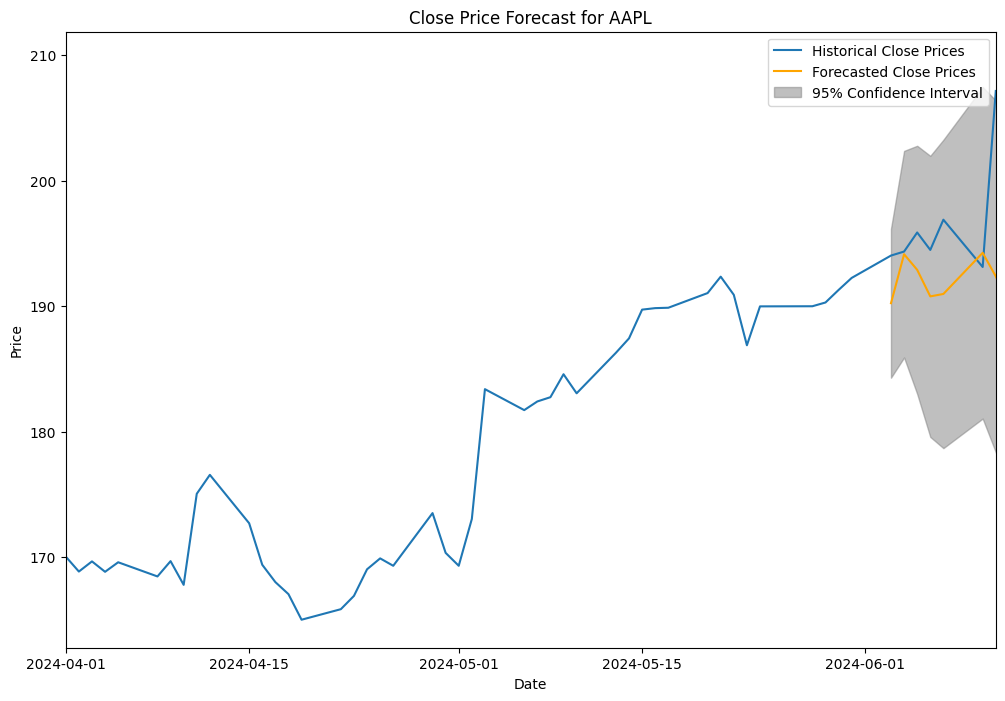

In [12]:
# Step 8: Visualize
# Import actual closing prices into real_values dataframe
real_values = yf.download("AAPL", end='2024-06-12')
plot_real = real_values.loc['2024-01-01':'2024-06-11', 'Close']
    
# Plot the extended historical data
plt.figure(figsize=(12, 8))
plt.plot(plot_real, label='Historical Close Prices')
plt.plot(pd.date_range(start='2024-06-01', periods=n_forecast, freq='B'), 
         forecast, label='Forecasted Close Prices', color='orange')
plt.fill_between(pd.date_range(start='2024-06-01', periods=n_forecast, freq='B'), 
                 conf_int[:, 0], conf_int[:, 1], color='gray', alpha=0.5, label='95% Confidence Interval')

# Adjust the x-axis and other labels
plt.xlim(pd.Timestamp('2024-04-01'), pd.Timestamp('2024-06-11'))
plt.title(f'Close Price Forecast for {stock_select_str1}')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [13]:
# Step 9: Output data and charts somewhere
forecast_df = pd.DataFrame({'Forecast': forecast}, index=pd.date_range(start='2023-06-01', periods=n_forecast, freq='B'))
forecast_df.to_csv('forecast_predictions.csv', index=True)